In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('mfp.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587186 entries, 0 to 587185
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         587186 non-null  int64  
 1   date            587186 non-null  object 
 2   sequence        587186 non-null  int64  
 3   food_ids        587186 non-null  object 
 4   total_calories  587186 non-null  int64  
 5   total_carbs     587186 non-null  int64  
 6   total_fat       586309 non-null  float64
 7   total_protein   586309 non-null  float64
 8   total_sodium    585881 non-null  float64
 9   total_sugar     585879 non-null  float64
 10  goal_calories   585264 non-null  float64
 11  goal_carbs      585261 non-null  float64
 12  goal_fat        559873 non-null  float64
 13  goal_protein    559868 non-null  float64
 14  goal_sodium     519466 non-null  float64
 15  goal_sugar      519196 non-null  float64
dtypes: float64(10), int64(4), object(2)
memory usage: 71.7+ 

In [4]:
data.head()

user_id        date  sequence                      food_ids  \
0        1  2014-09-15         1               [1, 2, 3, 4, 4]   
1        1  2014-09-16         1            [5, 1, 2, 3, 6, 7]   
2        1  2014-09-17         1        [1, 2, 3, 6, 8, 9, 10]   
3        1  2014-09-18         1          [1, 6, 2, 3, 11, 12]   
4        1  2014-09-19         1  [1, 7, 13, 12, 2, 3, 12, 12]   

   total_calories  total_carbs  total_fat  total_protein  total_sodium  \
0            2430           96       37.0           50.0         855.0   
1            1862          158       54.0          114.0        2215.0   
2            2251          187       60.0           98.0        1765.0   
3            2001          113       81.0          202.0        1101.0   
4            2158          180       89.0          115.0        1998.0   

   total_sugar  goal_calories  goal_carbs  goal_fat  goal_protein  \
0         63.0         1572.0       196.0      52.0          79.0   
1        100.0         1832.0       229.0      61.0          92.0   
2        105.0         1685.0       210.0      56.0          85.0   
3         71.0         1597.0       199.0      53.0          80.0   
4         84.0         1589.0       198.0      53.0          80.0   

   goal_sodium  goal_sugar  
0       2300.0        59.0  
1       2300.0        69.0  
2       2300.0        63.0  
3       2300.0        60.0  
4       2300.0        60.0

In [5]:
data.isna().sum()

user_id               0
date                  0
sequence              0
food_ids              0
total_calories        0
total_carbs           0
total_fat           877
total_protein       877
total_sodium       1305
total_sugar        1307
goal_calories      1922
goal_carbs         1925
goal_fat          27313
goal_protein      27318
goal_sodium       67720
goal_sugar        67990
dtype: int64

In [6]:
data.describe()

user_id       sequence  total_calories    total_carbs  \
count  587186.000000  587186.000000    5.871860e+05  587186.000000   
mean     4946.928031       4.004532    1.421923e+03     153.679057   
std      2844.719822       1.341577    2.284502e+03     355.777029   
min         1.000000       1.000000    0.000000e+00       0.000000   
25%      2513.000000       3.000000    1.038000e+03      76.000000   
50%      4928.000000       4.000000    1.403000e+03     135.000000   
75%      7427.000000       5.000000    1.766000e+03     191.000000   
max      9897.000000       6.000000    1.200800e+06  210865.000000   

           total_fat  total_protein   total_sodium    total_sugar  \
count  586309.000000  586309.000000  585881.000000  585879.000000   
mean       71.235077      93.821524    1157.984207     407.563147   
std       277.018504     289.062514    2049.176072     907.108966   
min         0.000000       0.000000       0.000000       0.000000   
25%        29.000000      40.000000      30.000000      22.000000   
50%        49.000000      66.000000     690.000000      51.000000   
75%        72.000000      98.000000    1982.000000     139.000000   
max    132088.000000  114949.000000  960000.000000  168015.000000   

       goal_calories     goal_carbs       goal_fat   goal_protein  \
count  585264.000000  585261.000000  559873.000000  559868.000000   
mean     1613.422573     194.222680      90.101536     157.212782   
std       722.874981     352.425203     240.765991     390.169810   
min         0.000000       0.000000       0.000000       0.000000   
25%      1314.000000     122.000000      46.000000      70.000000   
50%      1630.000000     178.000000      58.000000      96.000000   
75%      1991.000000     227.000000      77.000000     135.000000   
max     26068.000000  154417.000000   38128.000000  102945.000000   

         goal_sodium     goal_sugar  
count  519466.000000  519196.000000  
mean     1446.919333     411.366736  
std      1166.553691     886.227384  
min         0.000000       0.000000  
25%        56.000000      45.000000  
50%      2300.000000      64.000000  
75%      2300.000000     100.000000  
max     23009.000000   35055.000000

# EDA

## Data cleaning

Removing columns with goal calories missing

In [7]:
data = data.drop(data[data.goal_calories.isnull()].index)

## Data visualization

<AxesSubplot:xlabel='sequence'>

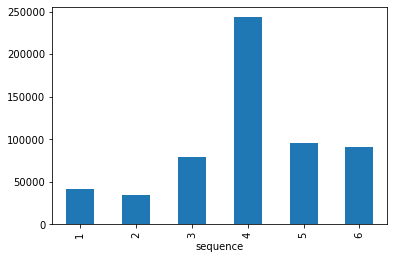

In [8]:
data.groupby("sequence")["user_id"].count().plot(kind='bar')

<AxesSubplot:xlabel='user_id'>

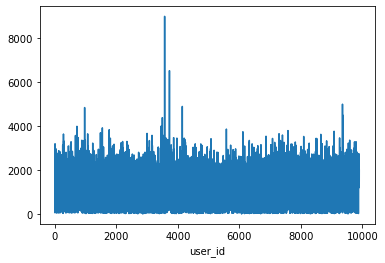

In [15]:
data.groupby("user_id")["goal_calories"].mean().plot()

<AxesSubplot:xlabel='user_id'>

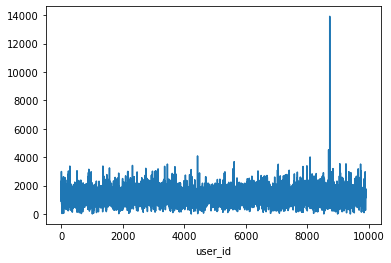

In [24]:
data.groupby("user_id")["total_calories"].mean().plot()

It can be seen clearly that there are outliers in the toal_calories column. Removing the entries with the total_calories over 30000 as this is close to humanely impossible.

In [28]:
data = data.drop(data[data.total_calories >30000].index)

<BarContainer object of 2 artists>

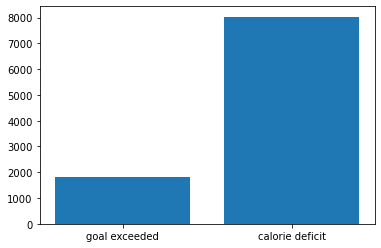

In [9]:
nd = (data.groupby("user_id")["total_calories"].mean() - data.groupby("user_id")["goal_calories"].mean())
freqs = [1 if i > 0 else -1 for i in nd]
c1=0
_c1 = 0
for i in freqs:
    if i>0:
        c1+=1
    else:
        _c1+=1
        
x = [1830, 8034]
y = ['goal exceeded','calorie deficit']
plt.bar(y,x)

<AxesSubplot:title={'center':'total_calories'}, xlabel='user_id'>

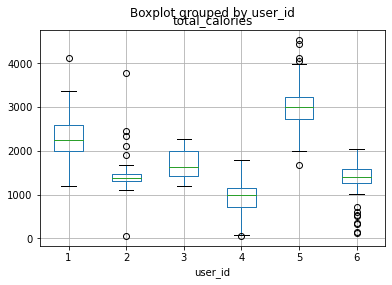

In [17]:
data.head(500).boxplot(column='total_calories', by='user_id')

<AxesSubplot:>

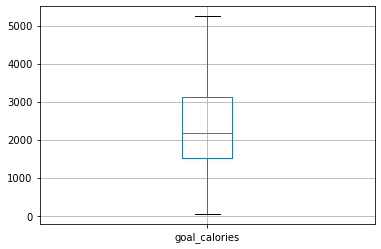

In [18]:
data.head(500).boxplot(column='goal_calories')

<AxesSubplot:ylabel='Frequency'>

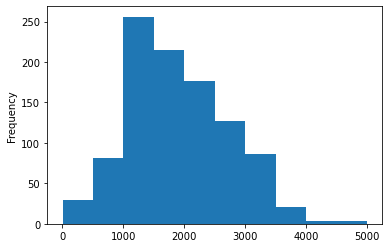

In [19]:
data.head(1000).total_calories.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

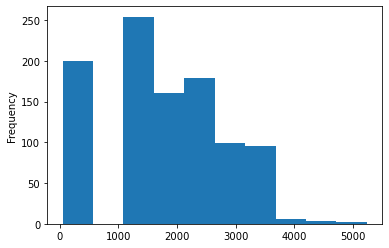

In [20]:
data.head(1000).goal_calories.plot(kind='hist')

In [ ]:
sns.lineplot(data=data, x='user_id', y='sequence')

Outlier removal

In [21]:
print(data[data.total_calories == data.total_calories.max()])
data = data.drop(axis=0,index=417957)

        user_id        date  sequence food_ids  total_calories  total_carbs  \
417957     7046  2015-01-30         2  [14816]         1200800            0   

        total_fat  total_protein  total_sodium  total_sugar  goal_calories  \
417957   132088.0            0.0           0.0          0.0         1300.0   

        goal_carbs  goal_fat  goal_protein  goal_sodium  goal_sugar  
417957        65.0      72.0          97.0        100.0        25.0  


In [27]:
data[data.total_calories >10000]

user_id        date  sequence  \
6531        112  2014-11-10         2   
108219     1859  2014-11-02         4   
130802     2231  2014-10-17         6   
135149     2315  2014-12-18         1   
135152     2315  2014-12-21         1   
...         ...         ...       ...   
572481     9655  2015-03-22         6   
572482     9655  2015-03-23         6   
572484     9655  2015-03-25         1   
572488     9655  2015-03-29         3   
586174     9881  2015-03-04         6   

                                                 food_ids  total_calories  \
6531                                              [15911]           21750   
108219  [157031, 76610, 10870, 89531, 197628, 27016, 6...           10917   
130802  [19137, 225958, 225959, 225960, 6921, 225961, ...           12531   
135149                                                [4]           11000   
135152                                                [4]           11500   
...                                                   ...             ...   
572481  [16472, 32917, 618691, 398, 98167, 618785, 122...           14750   
572482  [98167, 618691, 16472, 353490, 27599, 19047, 6...           15020   
572484     [16472, 618691, 251726, 155693, 81563, 329236]           21269   
572488              [27599, 16472, 37300, 618691, 233252]           13540   
586174  [1094, 208076, 3186, 35866, 628148, 10601, 553...           11893   

        total_carbs  total_fat  total_protein  total_sodium  total_sugar  \
6531            325      600.0         3725.0      242500.0          0.0   
108219          876      715.0          123.0           4.0       1600.0   
130802        27945     1646.0          757.0         463.0        101.0   
135149            0        0.0            0.0           0.0          0.0   
135152            0        0.0            0.0           0.0          0.0   
...             ...        ...            ...           ...          ...   
572481         3517      115.0          286.0        2727.0       1799.0   
572482         3589      110.0          280.0        1979.0       1825.0   
572484         5428       84.0          283.0         953.0       2803.0   
572488         3403       78.0          174.0         390.0       1759.0   
586174         2093      382.0          312.0        6474.0       1043.0   

        goal_calories  goal_carbs  goal_fat  goal_protein  goal_sodium  \
6531           1920.0        24.0     149.0         120.0       2300.0   
108219          100.0        98.0      80.0          25.0          NaN   
130802         1760.0      1800.0     110.0          40.0        154.0   
135149         1340.0       134.0      45.0         101.0       2300.0   
135152         1887.0       189.0      63.0         142.0       2300.0   
...               ...         ...       ...           ...          ...   
572481         2815.0       351.0      93.0         139.0       2300.0   
572482         2062.0       257.0      68.0         102.0       2300.0   
572484         2184.0       272.0      72.0         108.0       2300.0   
572488         1848.0       230.0      61.0          91.0       2300.0   
586174          322.0        76.0       0.0           4.0       2300.0   

        goal_sugar  
6531          38.0  
108219         NaN  
130802        25.0  
135149        50.0  
135152        71.0  
...            ...  
572481        91.0  
572482        67.0  
572484        71.0  
572488        60.0  
586174       100.0  

[62 rows x 16 columns]

In [ ]:
len(data[data.total_calories < 500]['user_id'].unique())

In [ ]:
data[data.goal_calories < 500]['user_id'].count()

In [ ]:
len(data.user_id.unique())

In [38]:
data[data.total_calories>20000]['user_id'].unique()

array([ 112, 5511, 6427, 9230, 9655], dtype=int64)